In [1]:
import math
import numpy as np
import pandas as pd
import h5py
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
import keras
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras import  layers, models
from keras.layers import Dense, Flatten, Flatten, BatchNormalization, Activation, Dropout

In [2]:
# Loading the dataset
train_dataset = h5py.File('train_signs.h5', "r") #provide proper path
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

test_dataset = h5py.File('test_signs.h5', "r")  #provide proper path
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

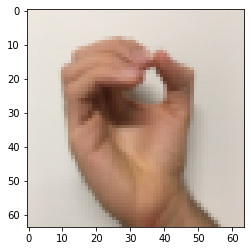

In [3]:
plt.imshow(train_set_x_orig[1], interpolation='nearest')
plt.show()

In [4]:
X_train = train_set_x_orig / 255.0
X_test = test_set_x_orig / 255.0

In [6]:
# add your model here

model = models.Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(256, activation='relu'),

    Dense(128, activation='relu'),

    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 62, 62, 16)        64        
_________________________________________________________________
activation_3 (Activation)    (None, 62, 62, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 29, 29, 32)       

In [7]:
model.fit(X_train, train_set_y_orig, epochs=25,
       validation_data= (X_test,test_set_y_orig))

Epoch 1/25
34/34 [==============================] - 4s 98ms/step - loss: 1.2646 - accuracy: 0.5741 - val_loss: 1.7723 - val_accuracy: 0.1750
Epoch 2/25
34/34 [==============================] - 3s 90ms/step - loss: 0.2450 - accuracy: 0.9222 - val_loss: 1.7721 - val_accuracy: 0.1667
Epoch 3/25
34/34 [==============================] - 3s 91ms/step - loss: 0.0748 - accuracy: 0.9778 - val_loss: 1.7859 - val_accuracy: 0.1583
Epoch 4/25
34/34 [==============================] - 3s 97ms/step - loss: 0.0318 - accuracy: 0.9935 - val_loss: 1.7825 - val_accuracy: 0.1750
Epoch 5/25
34/34 [==============================] - 3s 93ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 1.7694 - val_accuracy: 0.2167
Epoch 6/25
34/34 [==============================] - 3s 89ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.7580 - val_accuracy: 0.2333
Epoch 7/25
34/34 [==============================] - 4s 112ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.7339 - val_accuracy: 0.2500
Epoch 8/25
3

In [8]:
loss, acc = model.evaluate(X_test,test_set_y_orig)
print('Test Accuracy:', acc)

4/4 [==============================] - 0s 20ms/step - loss: 0.1427 - accuracy: 0.9500
Test Accuracy: 0.949999988079071


In [10]:
#saving the model

model.save('model_cnn.h5')

In [15]:
#load saved model

loaded_model = models.load_model('model_cnn.h5')